## Question 2

### Preparing the data

In [1]:
import numpy as np
# pandas handles dataframes (exactly the same as tables in Matlab)
import pandas as pd
# matplotlib emulates Matlabs plotting functionality
import matplotlib.pyplot as plt
# stats models is a package that is going to perform the regression analysis
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
import scipy
# os allows us to manipulate variables on out local machine, such as paths and environment variables
import os
# self explainatory, dates and times
from datetime import datetime, date
# a helper package to help us iterate over objects
import itertools
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# np.set_printoptions(threshold=np.inf)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
from sklearn.preprocessing import normalize

In [2]:
movies = pd.read_csv(r'D:\Assignment_1B_Data\Data\Q2\movies.csv')
ratings = pd.read_csv(r'D:\Assignment_1B_Data\Data\Q2\ratings.csv')
del ratings['timestamp']
movieRating = ratings.merge(movies, left_on='movieId', right_on='movieId')
movieRating

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
100831,610,160341,2.5,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,Blair Witch (2016),Horror|Thriller


In [3]:
from sklearn.cluster import KMeans

In [4]:
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
user_movie_ratings


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [33]:
top_1000_movies = pd.DataFrame()
top_1000_movies = movieRating['title'].value_counts().index.tolist()[:1000]
# reviews_for_top_1000 = top_1000_movies.merge(movieRating, left_on='title', right_on='title')
user_movie_ratings.drop(user_movie_ratings.columns.difference(top_1000_movies), 1, inplace=True)
user_movie_ratings = user_movie_ratings.apply(lambda row: row.fillna(row.mean()), axis=1)

data_scaled = preprocessing.normalize(user_movie_ratings)
data_scaled = pd.DataFrame(data_scaled, columns=user_movie_ratings.columns)
data_scaled

title,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),"13th Warrior, The (1999)",2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",...,X-Men: First Class (2011),X-Men: The Last Stand (2006),X2: X-Men United (2003),Yes Man (2008),You've Got Mail (1998),Young Frankenstein (1974),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016)
0,0.031542,0.031542,0.031542,0.031542,0.031542,0.028659,0.031542,0.031542,0.031542,0.031542,...,0.031542,0.031542,0.031542,0.031542,0.031542,0.035823,0.031542,0.031542,0.031542,0.031542
1,0.031613,0.031613,0.031613,0.031613,0.031613,0.031613,0.031613,0.031613,0.031613,0.031613,...,0.031613,0.031613,0.031613,0.031613,0.031613,0.031613,0.031613,0.024261,0.031613,0.031613
2,0.031267,0.031267,0.031267,0.031267,0.031267,0.031267,0.031267,0.031267,0.031267,0.031267,...,0.031267,0.031267,0.031267,0.031267,0.009656,0.031267,0.031267,0.031267,0.031267,0.031267
3,0.031330,0.031330,0.031330,0.031330,0.045015,0.031330,0.031330,0.031330,0.031330,0.031330,...,0.031330,0.031330,0.031330,0.031330,0.031330,0.031330,0.031330,0.031330,0.031330,0.031330
4,0.031578,0.031578,0.031578,0.031578,0.031578,0.031578,0.031578,0.031578,0.031578,0.031578,...,0.031578,0.031578,0.031578,0.031578,0.031578,0.031578,0.031578,0.031578,0.031578,0.031578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.031338,0.031338,0.031338,0.031338,0.031338,0.031338,0.042607,0.031338,0.031338,0.031338,...,0.031338,0.031338,0.031338,0.031338,0.029825,0.029825,0.031338,0.031338,0.031338,0.031338
606,0.031474,0.031474,0.031474,0.031474,0.031474,0.031474,0.031474,0.031474,0.031474,0.031474,...,0.031474,0.031474,0.031474,0.031474,0.031474,0.031474,0.031474,0.031474,0.031474,0.031474
607,0.030917,0.030917,0.030917,0.030917,0.030917,0.030917,0.027981,0.032645,0.046635,0.030917,...,0.030917,0.037308,0.037308,0.030917,0.030917,0.030917,0.030917,0.030917,0.027981,0.030917
608,0.031615,0.031615,0.031615,0.031615,0.031615,0.031615,0.031615,0.031615,0.031615,0.031615,...,0.031615,0.031615,0.031615,0.031615,0.031615,0.031615,0.031615,0.031615,0.031615,0.031615


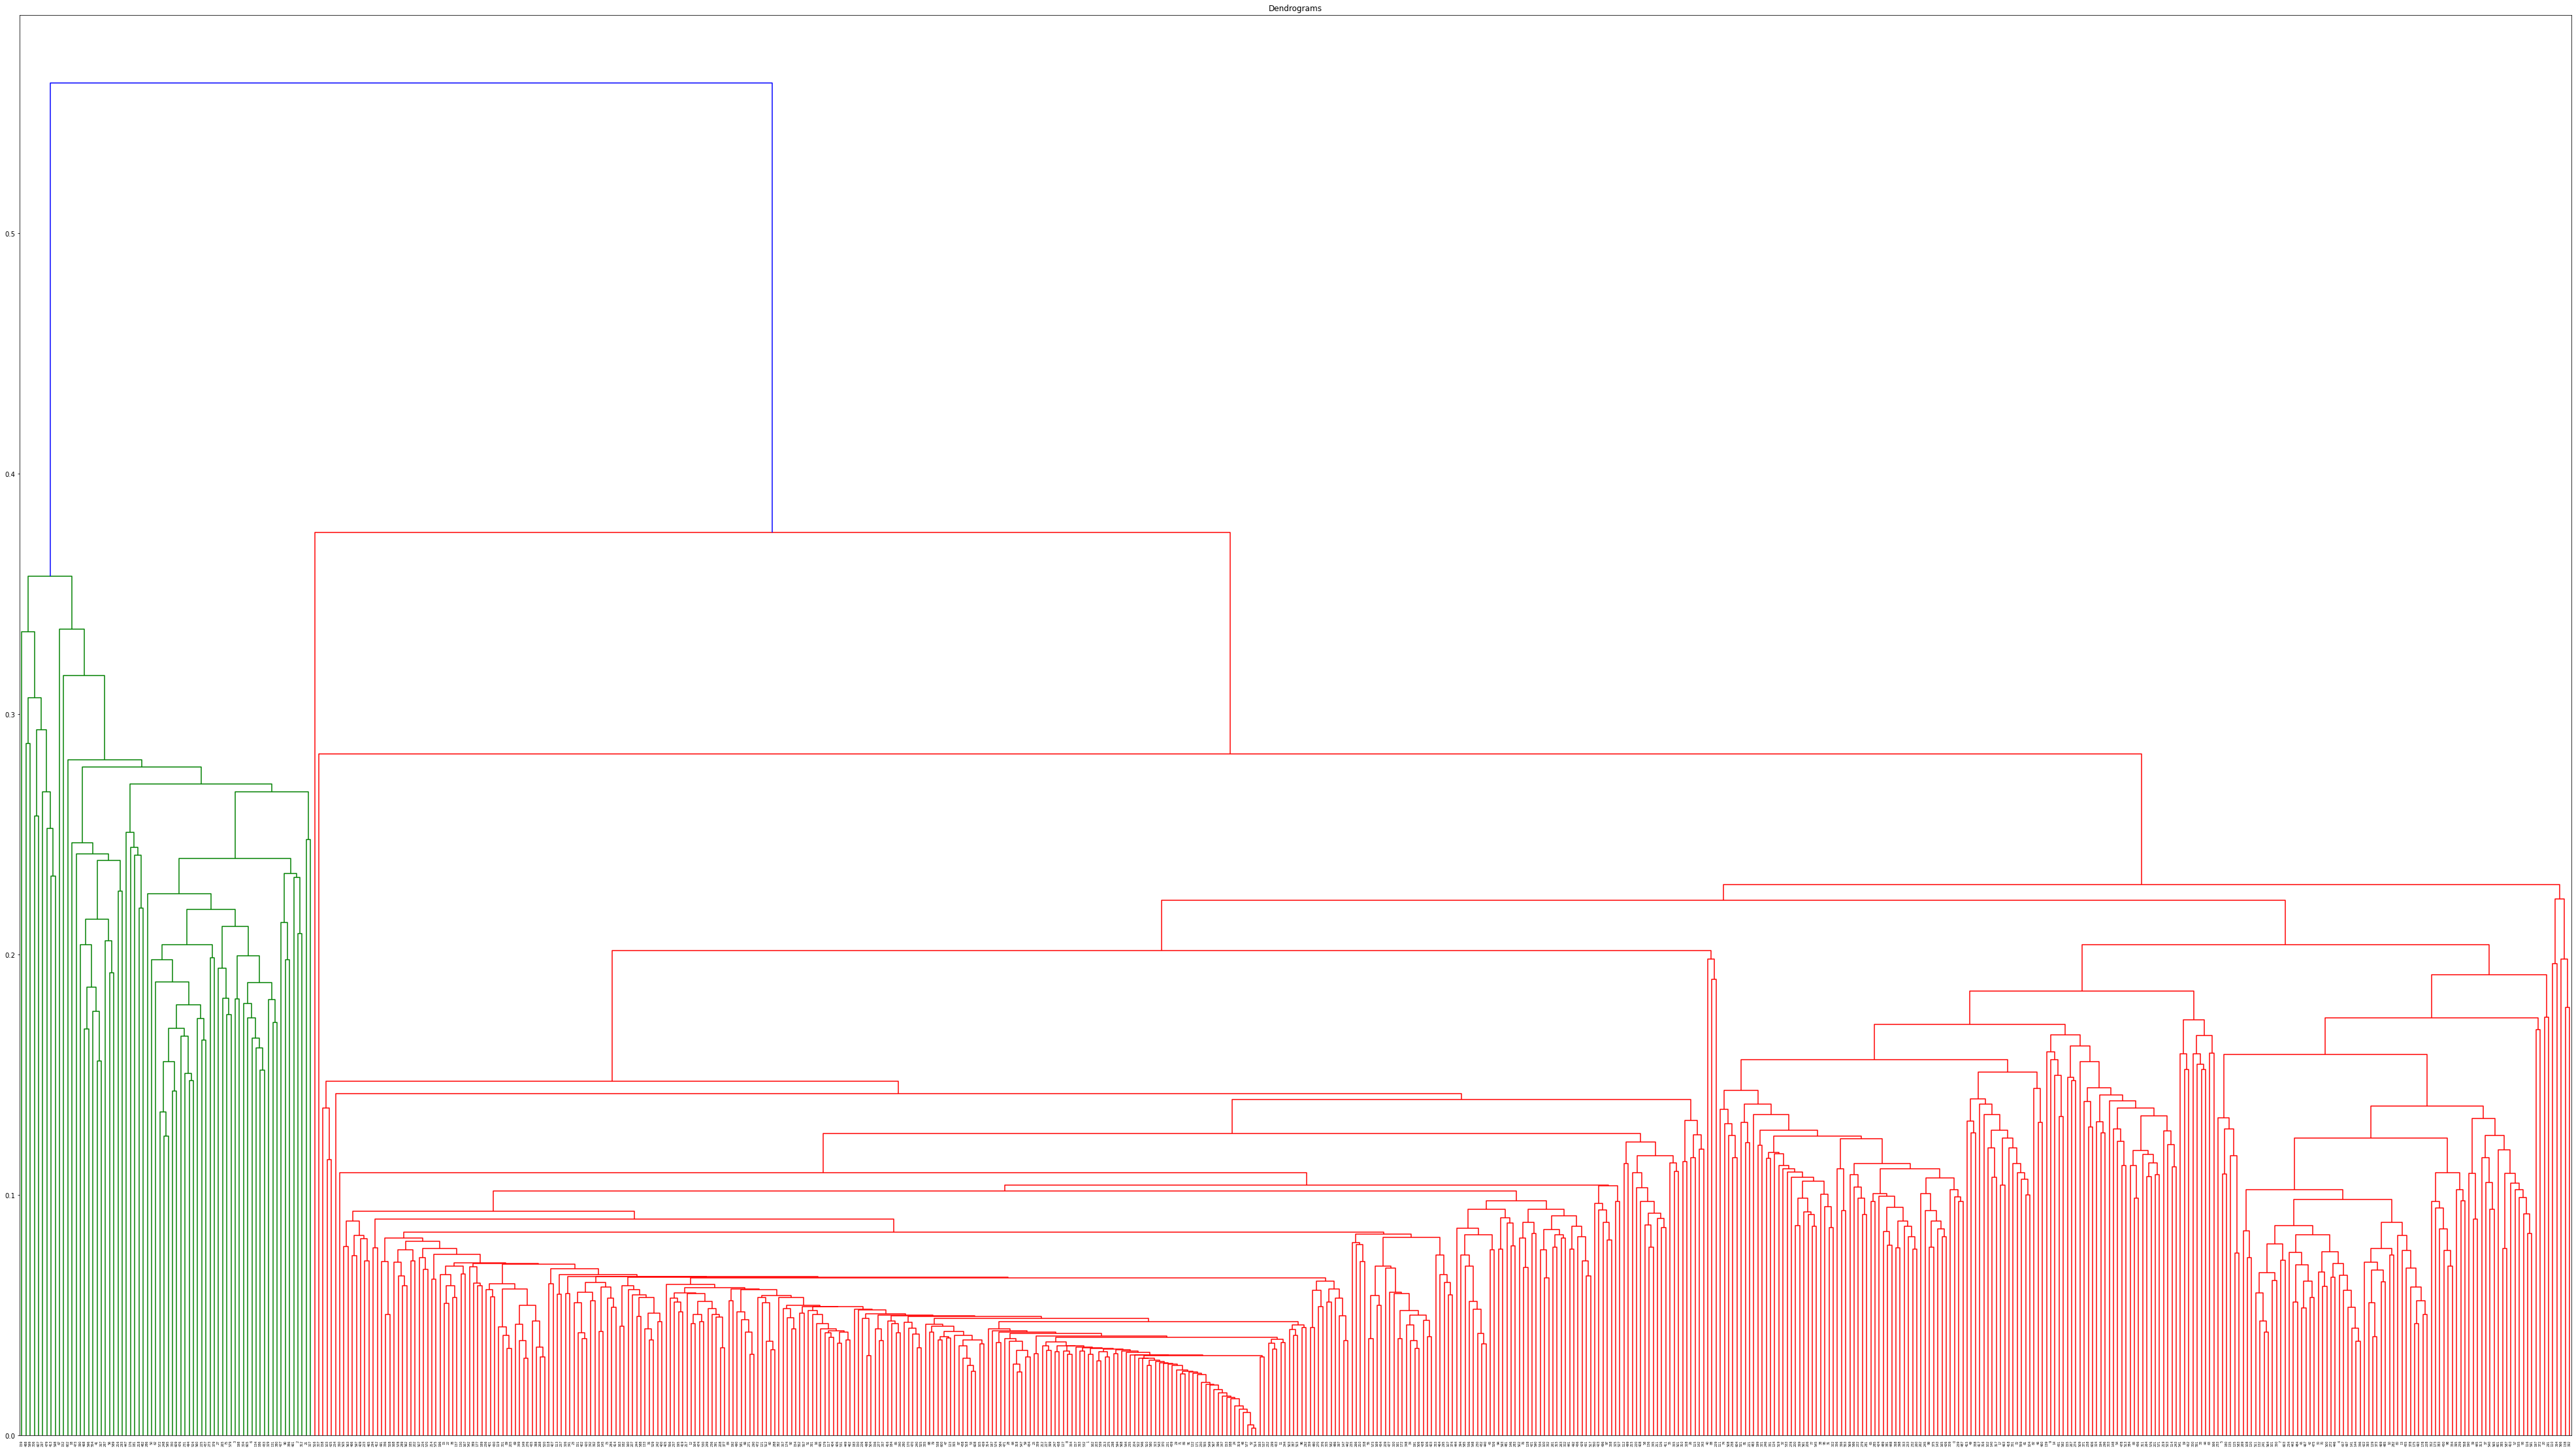

In [34]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(70, 40))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [40]:
from sklearn.cluster import AgglomerativeClustering 
y_hc = AgglomerativeClustering(n_clusters = 50, affinity = 'euclidean', linkage ='ward')
y_hc.fit_predict(data_scaled)
labels = y_hc.labels_
labels = pd.DataFrame(data=labels, dtype=np.int8)
data_scaled['Cluster'] = labels
data_scaled['Cluster'].value_counts()

cluster_centroids = data_scaled.groupby(['Cluster'])[data_scaled.columns].mean()
cluster_centroids
# data_scaled = ratings.merge(movies, left_on='movieId', right_on='movieId')



title,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),"13th Warrior, The (1999)",2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",...,Yes Man (2008),You've Got Mail (1998),Young Frankenstein (1974),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),Cluster_Kmeans,userId,Cluster
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.030266,0.032084,0.031825,0.031559,0.032160,0.031559,0.031559,0.031371,0.031911,0.031614,...,0.031544,0.031801,0.031559,0.031686,0.031511,0.031511,0.031400,1.222222,126.5,0
1,0.031609,0.031609,0.031506,0.031609,0.031828,0.031130,0.032622,0.031441,0.031633,0.031820,...,0.031215,0.031254,0.032731,0.031025,0.032300,0.028892,0.031609,0.941176,419.0,1
2,0.031780,0.030805,0.031218,0.031629,0.031640,0.029855,0.031785,0.031952,0.031459,0.031201,...,0.030621,0.031022,0.031523,0.031523,0.032030,0.031453,0.031534,1.235294,557.0,2
3,0.031614,0.031299,0.031450,0.031591,0.031591,0.029179,0.029904,0.031119,0.032385,0.031535,...,0.031540,0.030373,0.032802,0.031287,0.032035,0.032251,0.031540,1.133333,274.0,3
4,0.031506,0.031506,0.030366,0.031506,0.031259,0.031311,0.034582,0.032065,0.032269,0.031297,...,0.031506,0.031646,0.032169,0.031506,0.031492,0.031506,0.031428,1.375000,49.5,4
5,0.031718,0.031220,0.031504,0.031437,0.033043,0.030894,0.031103,0.031504,0.031504,0.031908,...,0.031504,0.031504,0.032716,0.031455,0.032349,0.031174,0.030773,1.375000,326.5,5
6,0.031584,0.031584,0.031584,0.031584,0.032872,0.031584,0.032103,0.031572,0.031584,0.031814,...,0.031328,0.031220,0.031584,0.032061,0.031584,0.031410,0.031584,1.000000,342.5,6
7,0.030974,0.031704,0.030974,0.031339,0.031570,0.031570,0.031570,0.031999,0.031704,0.031582,...,0.030974,0.031570,0.031726,0.031570,0.031427,0.031570,0.031570,1.000000,510.0,7
8,0.031544,0.031544,0.031544,0.031544,0.029868,0.031544,0.032340,0.031544,0.031544,0.031544,...,0.031544,0.031544,0.031411,0.031544,0.031544,0.031544,0.031859,1.142857,394.5,8


In [41]:
predictions = KMeans(n_clusters=50, algorithm = "auto", n_init=1, init = cluster_centroids).fit(data_scaled)

In [42]:
diff = predictions.labels_ - labels.to_numpy().reshape(610)
data_scaled['Cluster_Kmeans'] = predictions.labels_
del data_scaled["Cluster"]
KMeans_cluster_centroids = data_scaled.groupby(['Cluster_Kmeans'])[data_scaled.columns].mean()
KMeans_cluster_centroids

title,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),"13th Warrior, The (1999)",2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",...,X2: X-Men United (2003),Yes Man (2008),You've Got Mail (1998),Young Frankenstein (1974),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),Cluster_Kmeans,userId
Cluster_Kmeans,,,,,,,,,,,,,,,,,,,,,
0,0.030266,0.032084,0.031825,0.031559,0.032160,0.031559,0.031559,0.031371,0.031911,0.031614,...,0.031740,0.031544,0.031801,0.031559,0.031686,0.031511,0.031511,0.031400,0.0,126.5
1,0.031609,0.031609,0.031506,0.031609,0.031828,0.031130,0.032622,0.031441,0.031633,0.031820,...,0.031150,0.031215,0.031254,0.032731,0.031025,0.032300,0.028892,0.031609,1.0,419.0
2,0.031780,0.030805,0.031218,0.031629,0.031640,0.029855,0.031785,0.031952,0.031459,0.031201,...,0.031534,0.030621,0.031022,0.031523,0.031523,0.032030,0.031453,0.031534,2.0,557.0
3,0.031614,0.031299,0.031450,0.031591,0.031591,0.029179,0.029904,0.031119,0.032385,0.031535,...,0.031895,0.031540,0.030373,0.032802,0.031287,0.032035,0.032251,0.031540,3.0,274.0
4,0.031506,0.031506,0.030366,0.031506,0.031259,0.031311,0.034582,0.032065,0.032269,0.031297,...,0.031687,0.031506,0.031646,0.032169,0.031506,0.031492,0.031506,0.031428,4.0,49.5
5,0.031718,0.031220,0.031504,0.031437,0.033043,0.030894,0.031103,0.031504,0.031504,0.031908,...,0.029971,0.031504,0.031504,0.032716,0.031455,0.032349,0.031174,0.030773,5.0,326.5
6,0.031584,0.031584,0.031584,0.031584,0.032872,0.031584,0.032103,0.031572,0.031584,0.031814,...,0.031584,0.031328,0.031220,0.031584,0.032061,0.031584,0.031410,0.031584,6.0,342.5
7,0.030974,0.031704,0.030974,0.031339,0.031570,0.031570,0.031570,0.031999,0.031704,0.031582,...,0.031570,0.030974,0.031570,0.031726,0.031570,0.031427,0.031570,0.031570,7.0,510.0
8,0.031544,0.031544,0.031544,0.031544,0.029868,0.031544,0.032340,0.031544,0.031544,0.031544,...,0.032820,0.031544,0.031544,0.031411,0.031544,0.031544,0.031544,0.031859,8.0,394.5


In [43]:
data_scaled['userId'] = np.arange(start=1, stop=611, step=1)
data_scaled[data_scaled['userId'] == 42]

title,(500) Days of Summer (2009),10 Things I Hate About You (1999),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),"13th Warrior, The (1999)",2001: A Space Odyssey (1968),28 Days Later (2002),300 (2007),"40-Year-Old Virgin, The (2005)",...,X2: X-Men United (2003),Yes Man (2008),You've Got Mail (1998),Young Frankenstein (1974),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),Cluster_Kmeans,userId
41,0.031325,0.031325,0.031325,0.031325,0.031325,0.031325,0.04195,0.031325,0.031325,0.031325,...,0.031325,0.031325,0.03356,0.031325,0.031325,0.031325,0.031325,0.031325,4,42


In [48]:
pd.set_option('display.max_rows', 200)

def ranking_cluster(cluster_num, KMeans_cluster_centroids, movieRatings, userId, movieRatingmovie, movies):
    rated = pd.DataFrame()
    rated['title'] = movieRating[movieRating['userId'] == userId]['title'].unique()

    df = KMeans_cluster_centroids.T
    df = df[cluster_num].sort_values(ascending=False).reset_index()
    df = df.drop([0,1])
    
    
    df = df.merge(movies, left_on='title', right_on='title')
    df['Rating'] = df[cluster_num]
    del df[cluster_num]

    return df
#     print(KMeans_cluster_centroids[KMeans_cluster_centroids['Cluster_Kmeans'] == cluster_num].max())


df = ranking_cluster(1, KMeans_cluster_centroids, movieRating, 42, movieRating, movies)
df.head(100)
rated = pd.DataFrame()
rated['title'] = movieRating[movieRating['userId'] == 42]['title'].unique()
df.head(100)


,title,movieId,genres,Rating
0,"Shawshank Redemption, The (1994)",318,Crime|Drama,0.037064
1,Pulp Fiction (1994),296,Comedy|Crime|Drama|Thriller,0.037040
2,Fight Club (1999),2959,Action|Crime|Drama|Thriller,0.036012
3,Forrest Gump (1994),356,Comedy|Drama|Romance|War,0.035447
4,Schindler's List (1993),527,Drama|War,0.034853
5,Dr. Strangelove or: How I Learned to Stop Worr...,750,Comedy|War,0.034089
6,Trainspotting (1996),778,Comedy|Crime|Drama,0.033885
7,"Godfather, The (1972)",858,Crime|Drama,0.033818
8,Monty Python and the Holy Grail (1975),1136,Adventure|Comedy|Fantasy,0.033712
9,"Usual Suspects, The (1995)",50,Crime|Mystery|Thriller,0.033662
